Bahmani S, Raj B, Boufounos P T. Greedy sparsity-constrained optimization[J]. The Journal of Machine Learning Research, 2013, 14(1): 807-841.

## Logistic Regression

### data generation

* p: 1000
* s*: 10
* $\beta^*_i$ ~ N(0, 1), $\forall i \in supp(\beta^*)$
* c ~ N(0, 1)
* $x = (x_1, \cdots, x_p)^T$, $x_{i+1}=\rho x_i+\sqrt{1-\rho^2}z_i$, where $x_1, z_i$ ~ N(0, 1)
* $y\in\{0,1\}$, $P(y=0)=\frac{1}{1+\exp^{x^T\beta^*+c}}$

### setting

* $L(\beta)=<\log(1+\exp^{Xbeta}) - y(Xbeta)>_n$, where $Xbeta=x^T\beta+c$
* L2 coef: $\lambda = 0.1\sqrt{\frac{\log(p)}{n}}$, there are two algos: GraSP and GraSP with L2
* $\rho \in \{0, 1/3, 1/2, \sqrt{2}/2\}$
* n: `range(50, 1001, 50)`
* repeat: 200

### metric

* the average value of the empirical logistic loss: $L(\hat{\beta})$ 
* relative error: $\|\hat{\beta}-\beta^*\| / \|\beta^*\|$
* x axis is sampling ratio: $n/p$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("GraSP.csv")


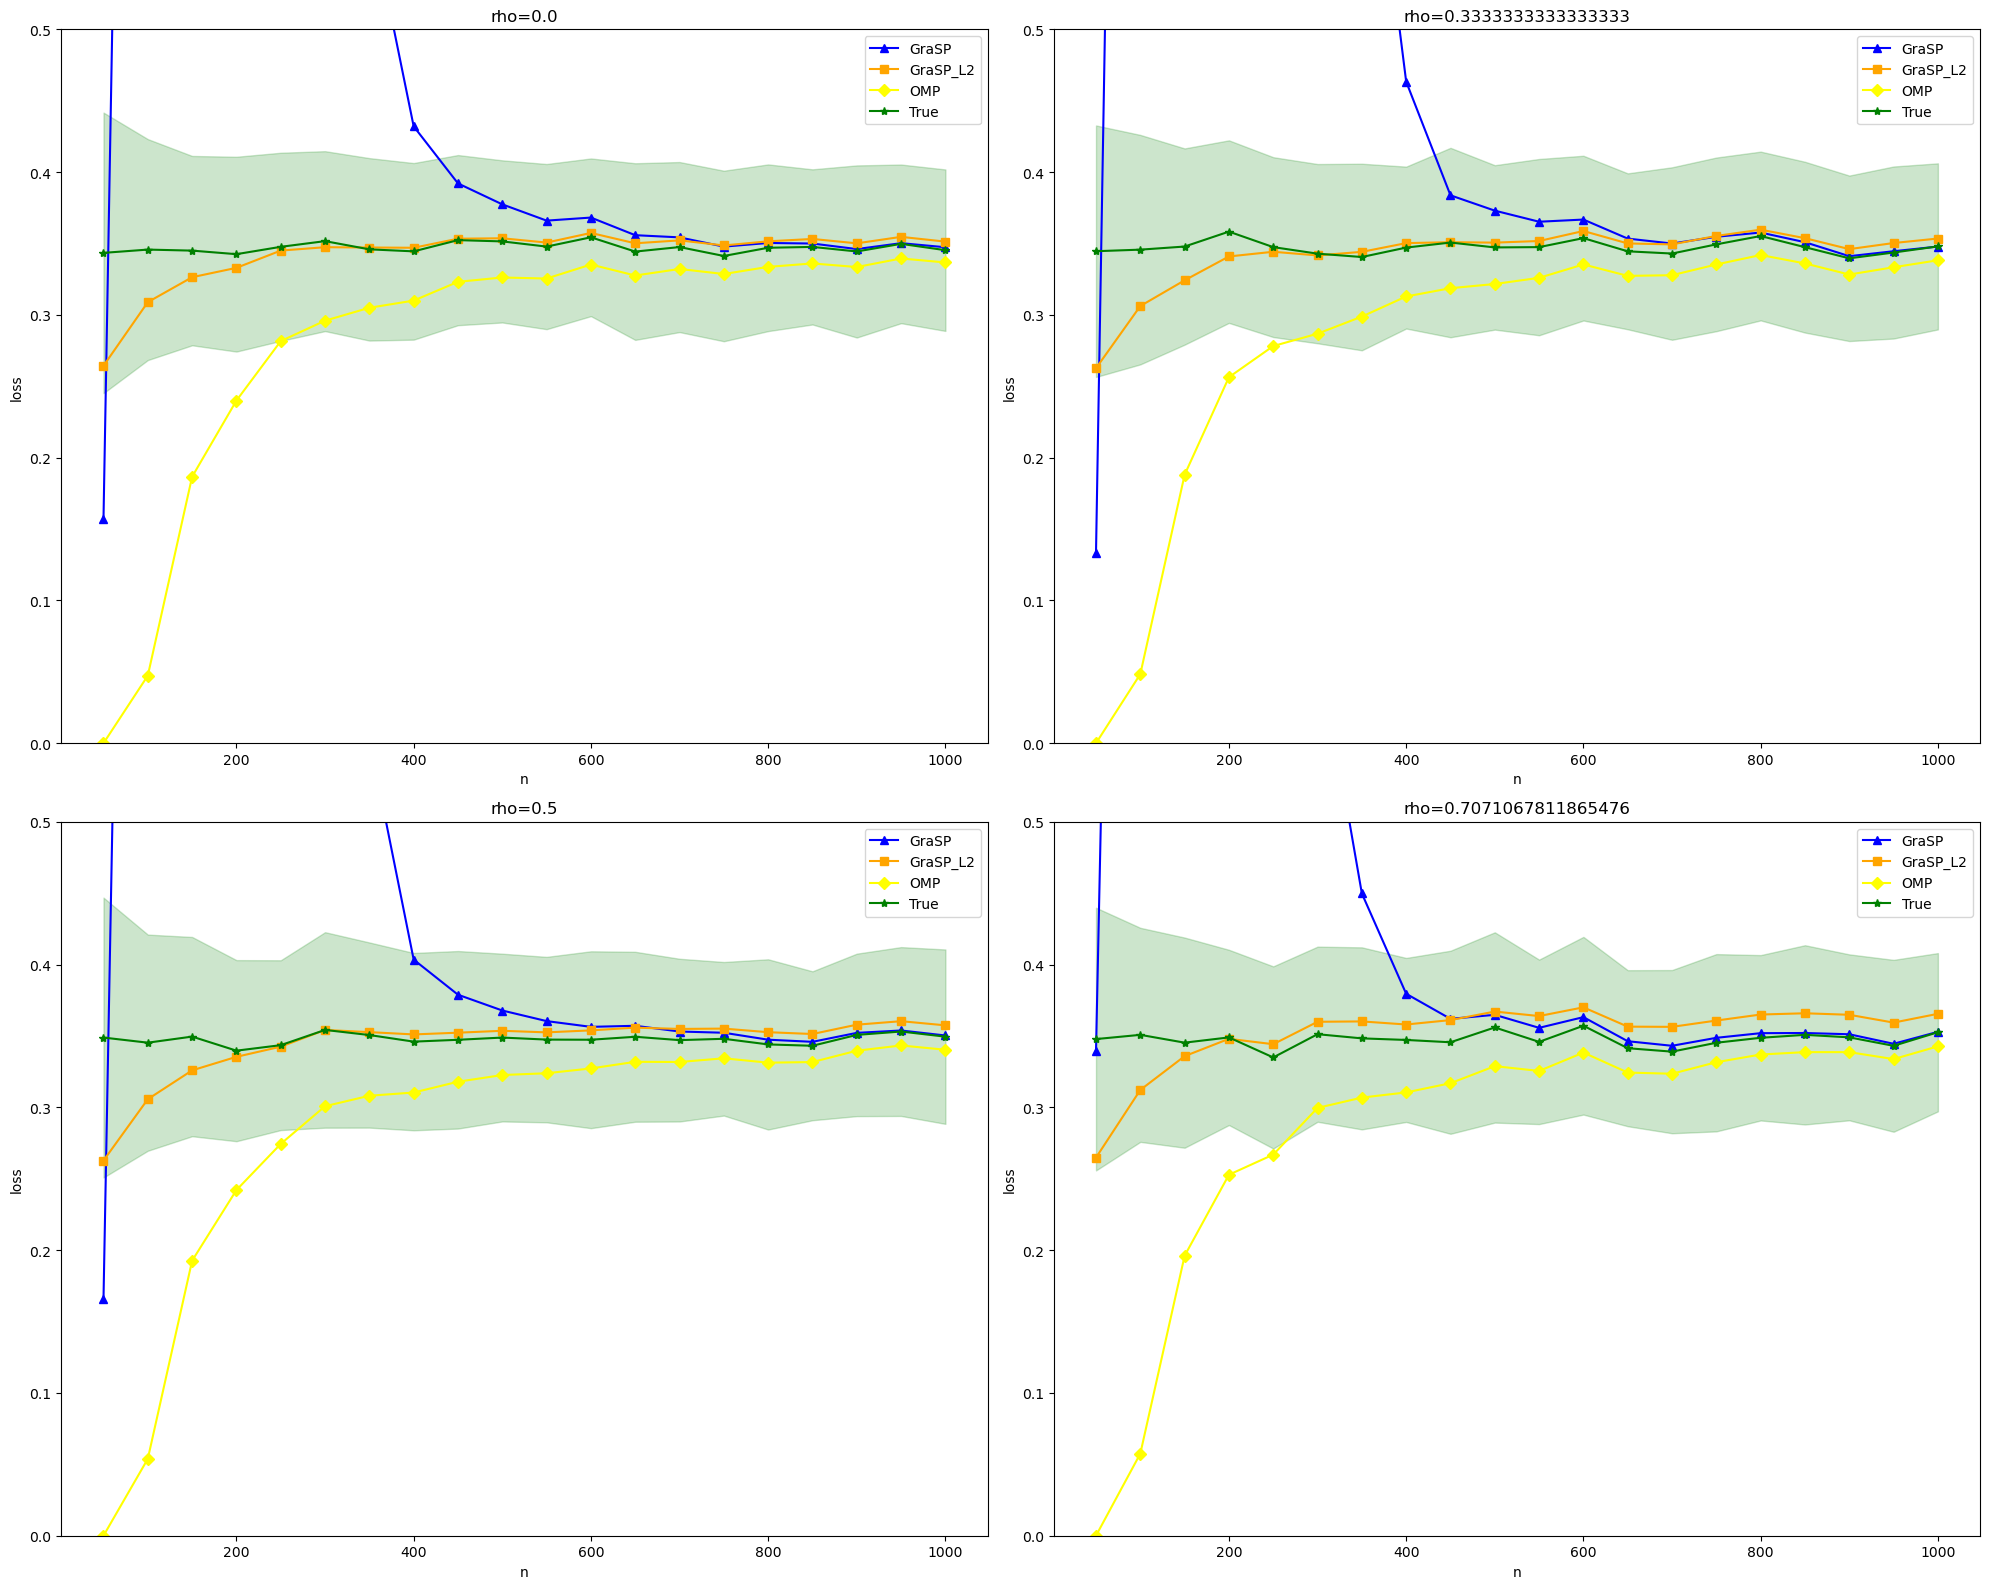

In [2]:
df_grouped = df.groupby(['n', 'rho', 'method'])['loss'].agg(['mean', 'std']).rename(columns={'mean': 'loss', 'std': 'std_loss'}).reset_index()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

for i, rho in enumerate(df_grouped['rho'].unique()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.set_title(f"rho={rho}")
    ax.set_xlabel("n")
    ax.set_ylabel("loss")
    ax.set_ylim([0, 0.5])

    for j, method in enumerate(df_grouped['method'].unique()):
        df_plot = df_grouped[(df_grouped['rho'] == rho) & (df_grouped['method'] == method)]

        if method == "True":
            ax.fill_between(df_plot['n'], df_plot['loss'] - df_plot['std_loss'], df_plot['loss'] + df_plot['std_loss'], alpha=0.2, color='green')
            ax.plot(df_plot['n'], df_plot['loss'], marker='*', color='green', label='True')
        elif method == "OMP":
            ax.plot(df_plot['n'], df_plot['loss'], marker='D', color='yellow', label='OMP')
        elif method == "GraSP":
            ax.plot(df_plot['n'], df_plot['loss'], marker='^', color='blue', label='GraSP')
        elif method == "GraSP_L2":
            ax.plot(df_plot['n'], df_plot['loss'], marker='s', color='orange', label='GraSP_L2')
    ax.legend()

plt.tight_layout()
plt.show()


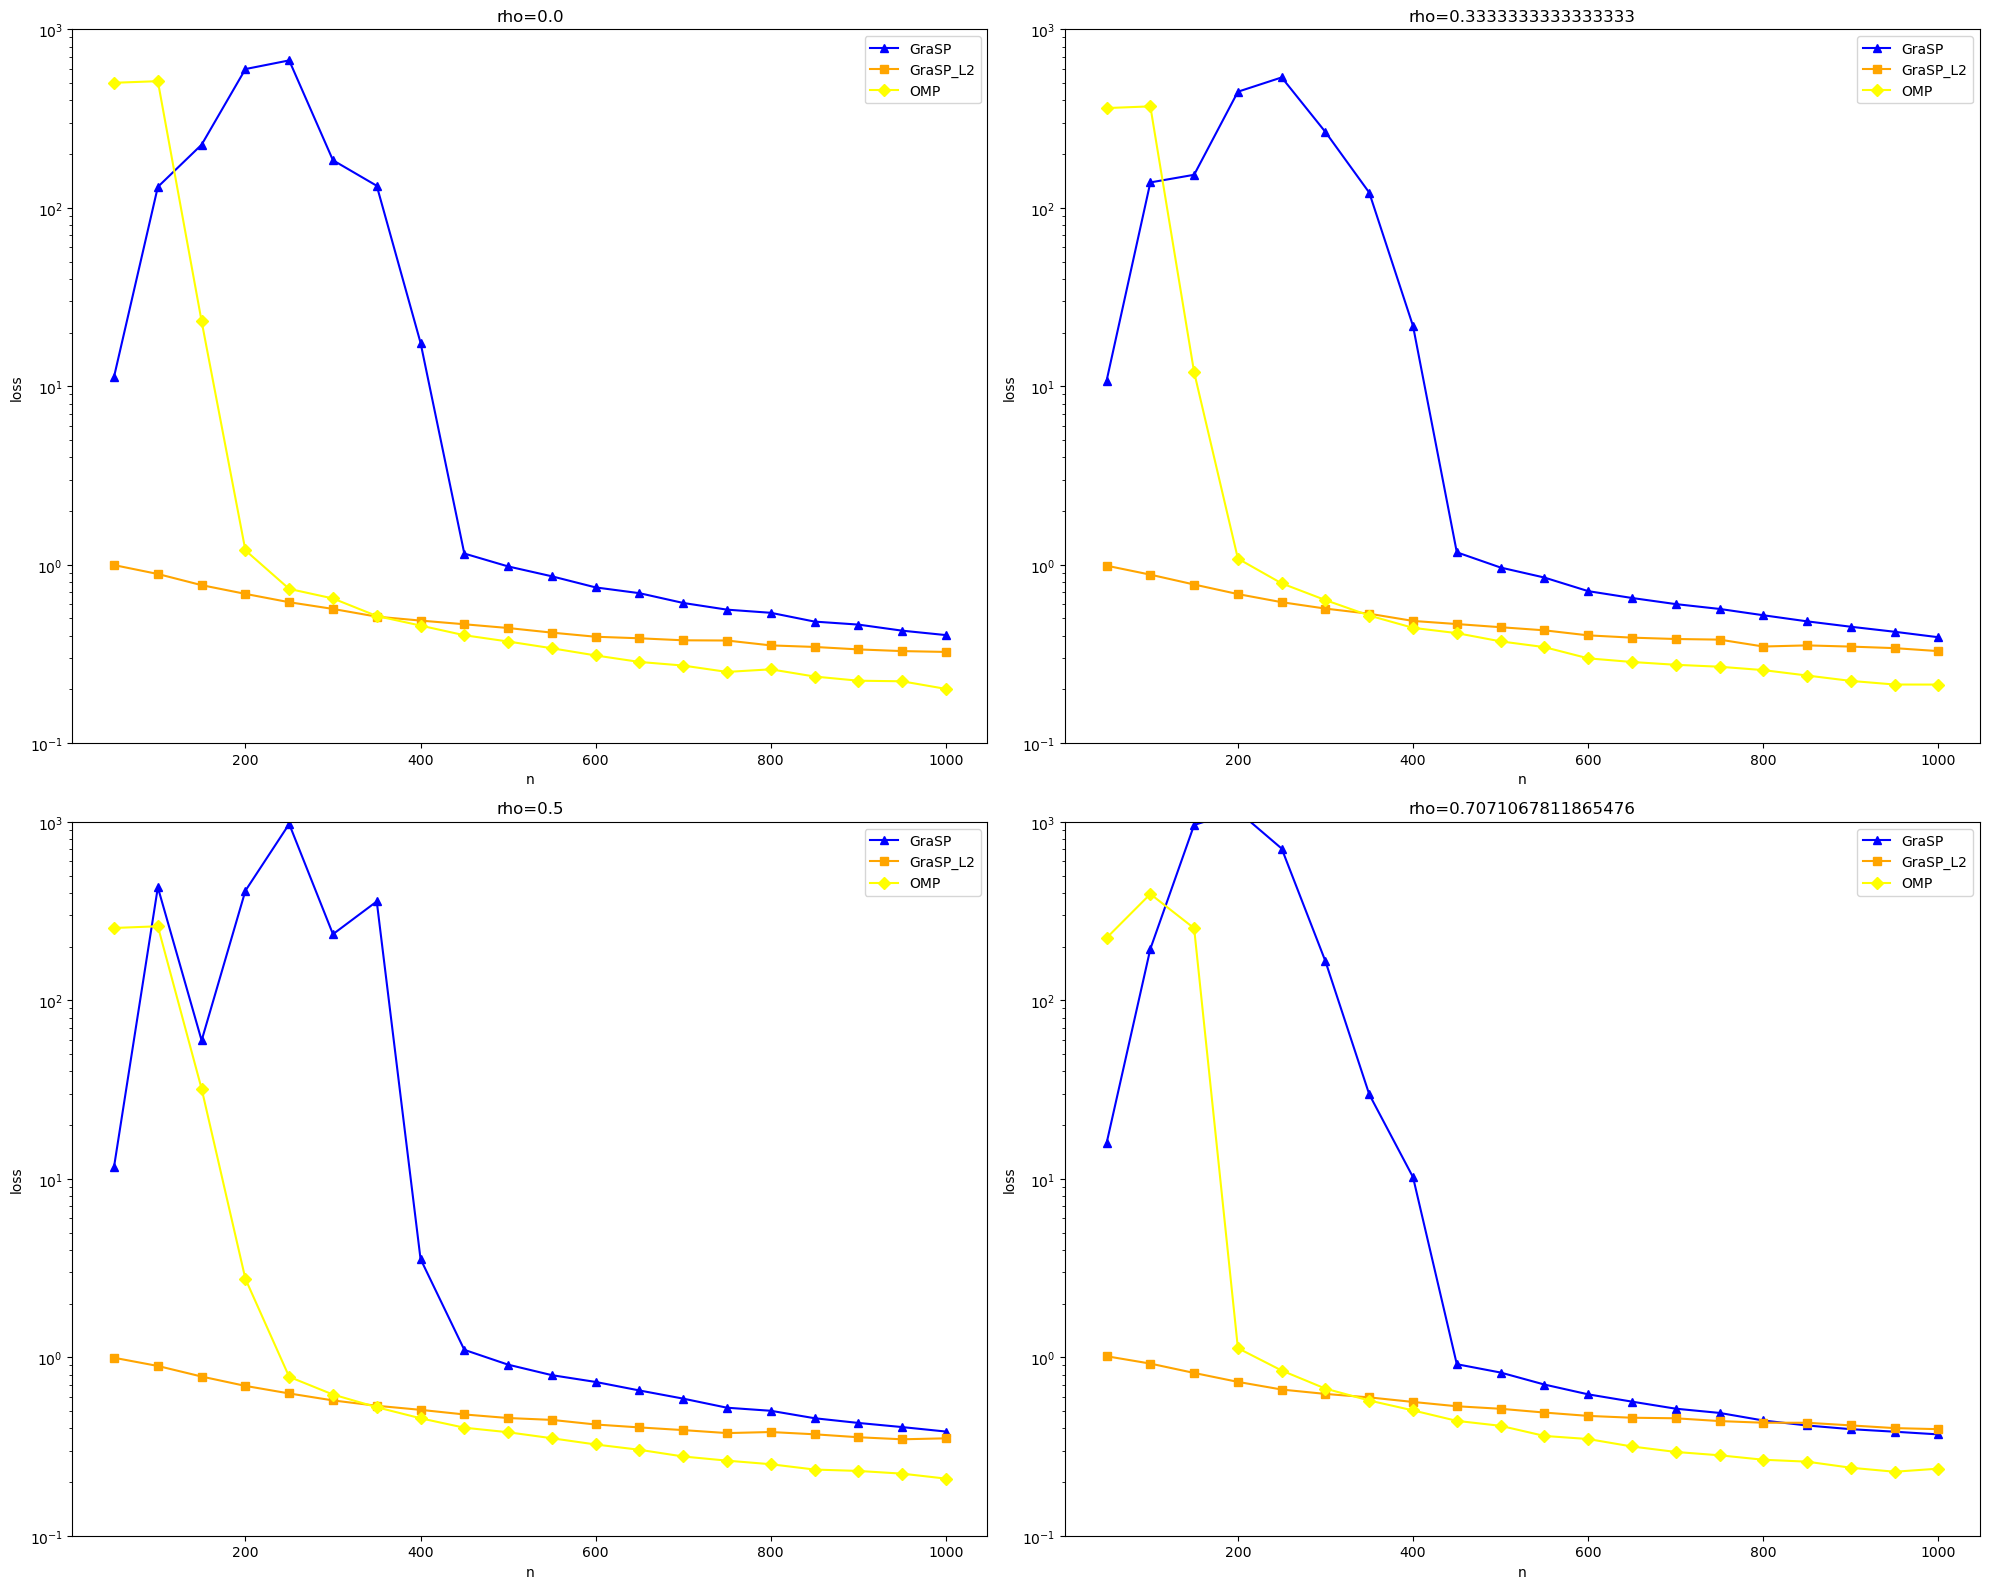

In [3]:
df_grouped = df.groupby(['n', 'rho', 'method'])['error'].mean().reset_index()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

for i, rho in enumerate(df_grouped['rho'].unique()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.set_title(f"rho={rho}")
    ax.set_xlabel("n")
    ax.set_ylabel("loss")
    ax.set_yscale("log")
    ax.set_ylim([0.1, 1000])

    for j, method in enumerate(df_grouped['method'].unique()):
        df_plot = df_grouped[(df_grouped['rho'] == rho) & (df_grouped['method'] == method)]

        if method == "OMP":
            ax.plot(df_plot['n'], df_plot['error'], marker='D', color='yellow', label='OMP')
        elif method == "GraSP":
            ax.plot(df_plot['n'], df_plot['error'], marker='^', color='blue', label='GraSP')
        elif method == "GraSP_L2":
            ax.plot(df_plot['n'], df_plot['error'], marker='s', color='orange', label='GraSP_L2')
    ax.legend()

plt.tight_layout()
plt.show()